In [1]:
# Importing packages
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
#Load Data From CSV File
df = pd.read_excel('fifa19.xlsx')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
#List of columns values
df.columns.values

array(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'S

In [4]:
'''
Clean up the dataset to remove columns that are not informative to us  
'''
df.drop(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage',
       'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB','Release Clause'], axis=1, inplace=True)

In [5]:
# After removal of attributes
df.head()

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [6]:
#Transform positions to 3 categories 'Striker', 'Midfielder', 'Defender'    
for i in ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']:
    df.loc[df.Position == i , 'Pos'] = 'Striker' 

for i in ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
    df.loc[df.Position == i , 'Pos'] = 'Midfielder' 

for i in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB']:
    df.loc[df.Position == i , 'Pos'] = 'Defender'
for i in ['GK']:
    df.loc[df.Position == i , 'Pos'] = 'Goalkeeper'

In [7]:
# After categorizing the positions
df.head()

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Pos
0,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,Striker
1,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,Striker
2,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,Striker
3,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,Goalkeeper
4,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,Midfielder


In [8]:
# Changing each position to a discrete value
df.loc[df['Pos'] == 'Goalkeeper', 'PosL'] = 1
df.loc[df['Pos'] == 'Defender', 'PosL'] = 2
df.loc[df['Pos'] == 'Midfielder', 'PosL'] = 3
df.loc[df['Pos'] == 'Striker', 'PosL'] = 4

In [9]:
#Prints data types of the df attributes 
print(df.dtypes)

Position            object
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
GKDiving           float64
GKHandling         float64
GKKicking          float64
GKPositioning      float64
GKReflexes         float64
Pos                 object
PosL               float64
d

In [10]:
#Statistical analysis of data distribution
print(df.describe())
#For all attributes including non-numeric
print(df.describe(include="all"))
print(df)

           Crossing     Finishing  HeadingAccuracy  ShortPassing  \
count  18159.000000  18159.000000     18159.000000  18159.000000   
mean      49.734181     45.550911        52.298144     58.686712   
std       18.364524     19.525820        17.379909     14.699495   
min        5.000000      2.000000         4.000000      7.000000   
25%       38.000000     30.000000        44.000000     54.000000   
50%       54.000000     49.000000        56.000000     62.000000   
75%       64.000000     62.000000        64.000000     68.000000   
max       93.000000     95.000000        94.000000     93.000000   

            Volleys     Dribbling         Curve    FKAccuracy   LongPassing  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      42.909026     55.371001     47.170824     42.863153     52.711933   
std       17.694408     18.910371     18.395264     17.478763     15.327870   
min        4.000000      4.000000      6.000000      3.000000      9.00

In [11]:
#It describes top and bottom 30 rows each for sample
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         18147 non-null  object 
 1   Crossing         18159 non-null  float64
 2   Finishing        18159 non-null  float64
 3   HeadingAccuracy  18159 non-null  float64
 4   ShortPassing     18159 non-null  float64
 5   Volleys          18159 non-null  float64
 6   Dribbling        18159 non-null  float64
 7   Curve            18159 non-null  float64
 8   FKAccuracy       18159 non-null  float64
 9   LongPassing      18159 non-null  float64
 10  BallControl      18159 non-null  float64
 11  Acceleration     18159 non-null  float64
 12  SprintSpeed      18159 non-null  float64
 13  Agility          18159 non-null  float64
 14  Reactions        18159 non-null  float64
 15  Balance          18159 non-null  float64
 16  ShotPower        18159 non-null  float64
 17  Jumping     

In [12]:
#For consistency, ensure that all column labels of type string.
# Let's examine the types of the column labels
all(isinstance(column, str) for column in df.columns)
df.columns = list(map(str, df.columns))
# Let's check the column labels types now
all(isinstance(column, str) for column in df.columns)

True

In [13]:
#See how many null objects in our data
df.isnull().sum()

Position           60
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
Pos                60
PosL               60
dtype: int64

In [14]:
# Dropping Null values
df = df.dropna()

In [15]:
#see how many null objects in our data after removing Null row values
df.isnull().sum()

Position           0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
Pos                0
PosL               0
dtype: int64

In [16]:
#*************************************************************************
#******************* Exploratory data analysis ***************************
#*************************************************************************
#Descrptive statistics
#Describe for numeric values
df.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PosL
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,...,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,49.738414,45.550229,52.300766,58.695432,42.912217,55.375158,47.176283,42.866038,52.721386,58.374828,...,58.651127,47.286053,47.701879,45.666336,16.616906,16.393839,16.233041,16.389651,16.712019,2.641924
std,18.364255,19.527445,17.381753,14.696075,17.695900,18.912224,18.396009,17.480034,15.325211,16.685643,...,11.437138,19.900450,21.663630,21.287961,17.698612,16.909971,16.504103,17.037031,17.957521,0.910924
min,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.000000
50%,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,3.000000
75%,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,3.000000
max,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,...,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,4.000000


In [17]:
# Clean Dataset
df.head()

,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Pos,PosL
0,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,Striker,4.0
1,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,Striker,4.0
2,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,Striker,4.0
3,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,Goalkeeper,1.0
4,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,Midfielder,3.0


In [18]:
#List of columns values
df.columns.values

array(['Position', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Pos', 'PosL'],
      dtype=object)

In [19]:
# Data size
df.shape

(18147, 37)

Index(['Position', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Pos',
       'PosL'],
      dtype='object')

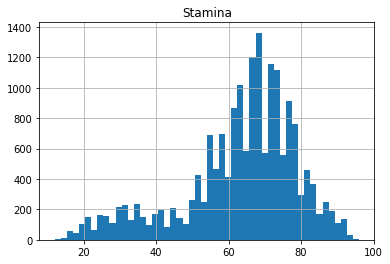

In [20]:
#Data Visualization and Analysis
df['PosL'].value_counts()
df.hist(column='Stamina', bins=50)
df.columns

In [21]:
#To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:
X = df[['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes',]].values
X[0:5]
y = df['PosL'].values
y[0:5]

array([4., 4., 4., 1., 3.])

In [22]:
#Normalize Data points
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.86571851,  2.53239138,  1.01829324,  2.13018987,  2.43496909,
         2.20100972,  2.49102833,  2.9253587 ,  2.23680828,  2.25500499,
         1.76740341,  1.45199812,  1.86197748,  3.68011986,  2.19555773,
         1.71364651,  0.24606372,  0.55224285, -0.50339013,  2.43408397,
        -0.45353233, -1.19354933,  2.25488778,  2.86947788,  1.68465684,
         3.26566855, -0.71789566, -0.90947002, -0.92384979, -0.59988879,
        -0.31898268, -0.07471326, -0.14026605, -0.48515932],
       [ 1.86571851,  2.48117999,  2.11142369,  1.51776459,  2.49148091,
         1.72511392,  1.83869496,  1.89558406,  1.58427072,  2.13513817,
         1.63344411,  1.79326309,  1.59113164,  3.7910977 ,  0.42698385,
         2.29385919,  2.52994096,  1.558789  ,  1.08996449,  2.38216993,
         0.41022167, -0.85533429,  2.30609124,  2.02119377,  2.32149078,
         3.17823168, -0.96915319, -0.77098526, -1.0647784 , -0.54338563,
        -0.31898268, -0.07471326, -0.14026605, -0.31809379],
  

In [23]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (14517, 34) (14517,)
Test set: (3630, 34) (3630,)


In [24]:
#K nearest neighbor (K-NN)
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [25]:
#Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([3., 3., 3., 1., 3.])

In [26]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8939863608183509
Test set Accuracy:  0.8636363636363636


In [27]:
#K value
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.81515152, 0.8261708 , 0.84793388, 0.85564738, 0.86501377,
       0.86418733, 0.86363636, 0.86749311, 0.86721763])

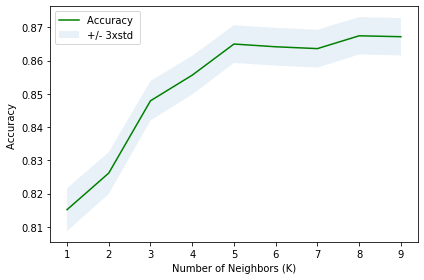

In [28]:
#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [29]:
# Optimal k value for best accurary
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()) 

The best accuracy was with 0.8674931129476584 with k = 7
